# Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import nltk

from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt 

# loading the dataset

In [3]:
data = pd.read_csv('IMDB_Dataset.csv')
data_frame = pd.DataFrame(data)
data_frame=data_frame[:100]
data_frame.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

# counting positive and negetive reviews

In [4]:
# data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})
data_frame['sentiment'].value_counts()

sentiment
negative    58
positive    42
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

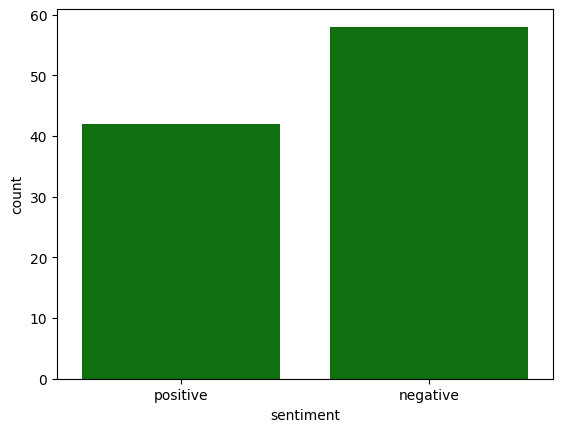

In [5]:
sns.countplot(x='sentiment', data=data_frame, color = 'g')

# confused

In [6]:
positive_review=list(data_frame[data_frame['sentiment']=='positive']['review'])
negative_review=list(data_frame[data_frame['sentiment']=='negative']['review'])

In [7]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080, 
                      width=1920, 
                      background_color='white', 
                      min_font_size=10, 
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(100,200))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

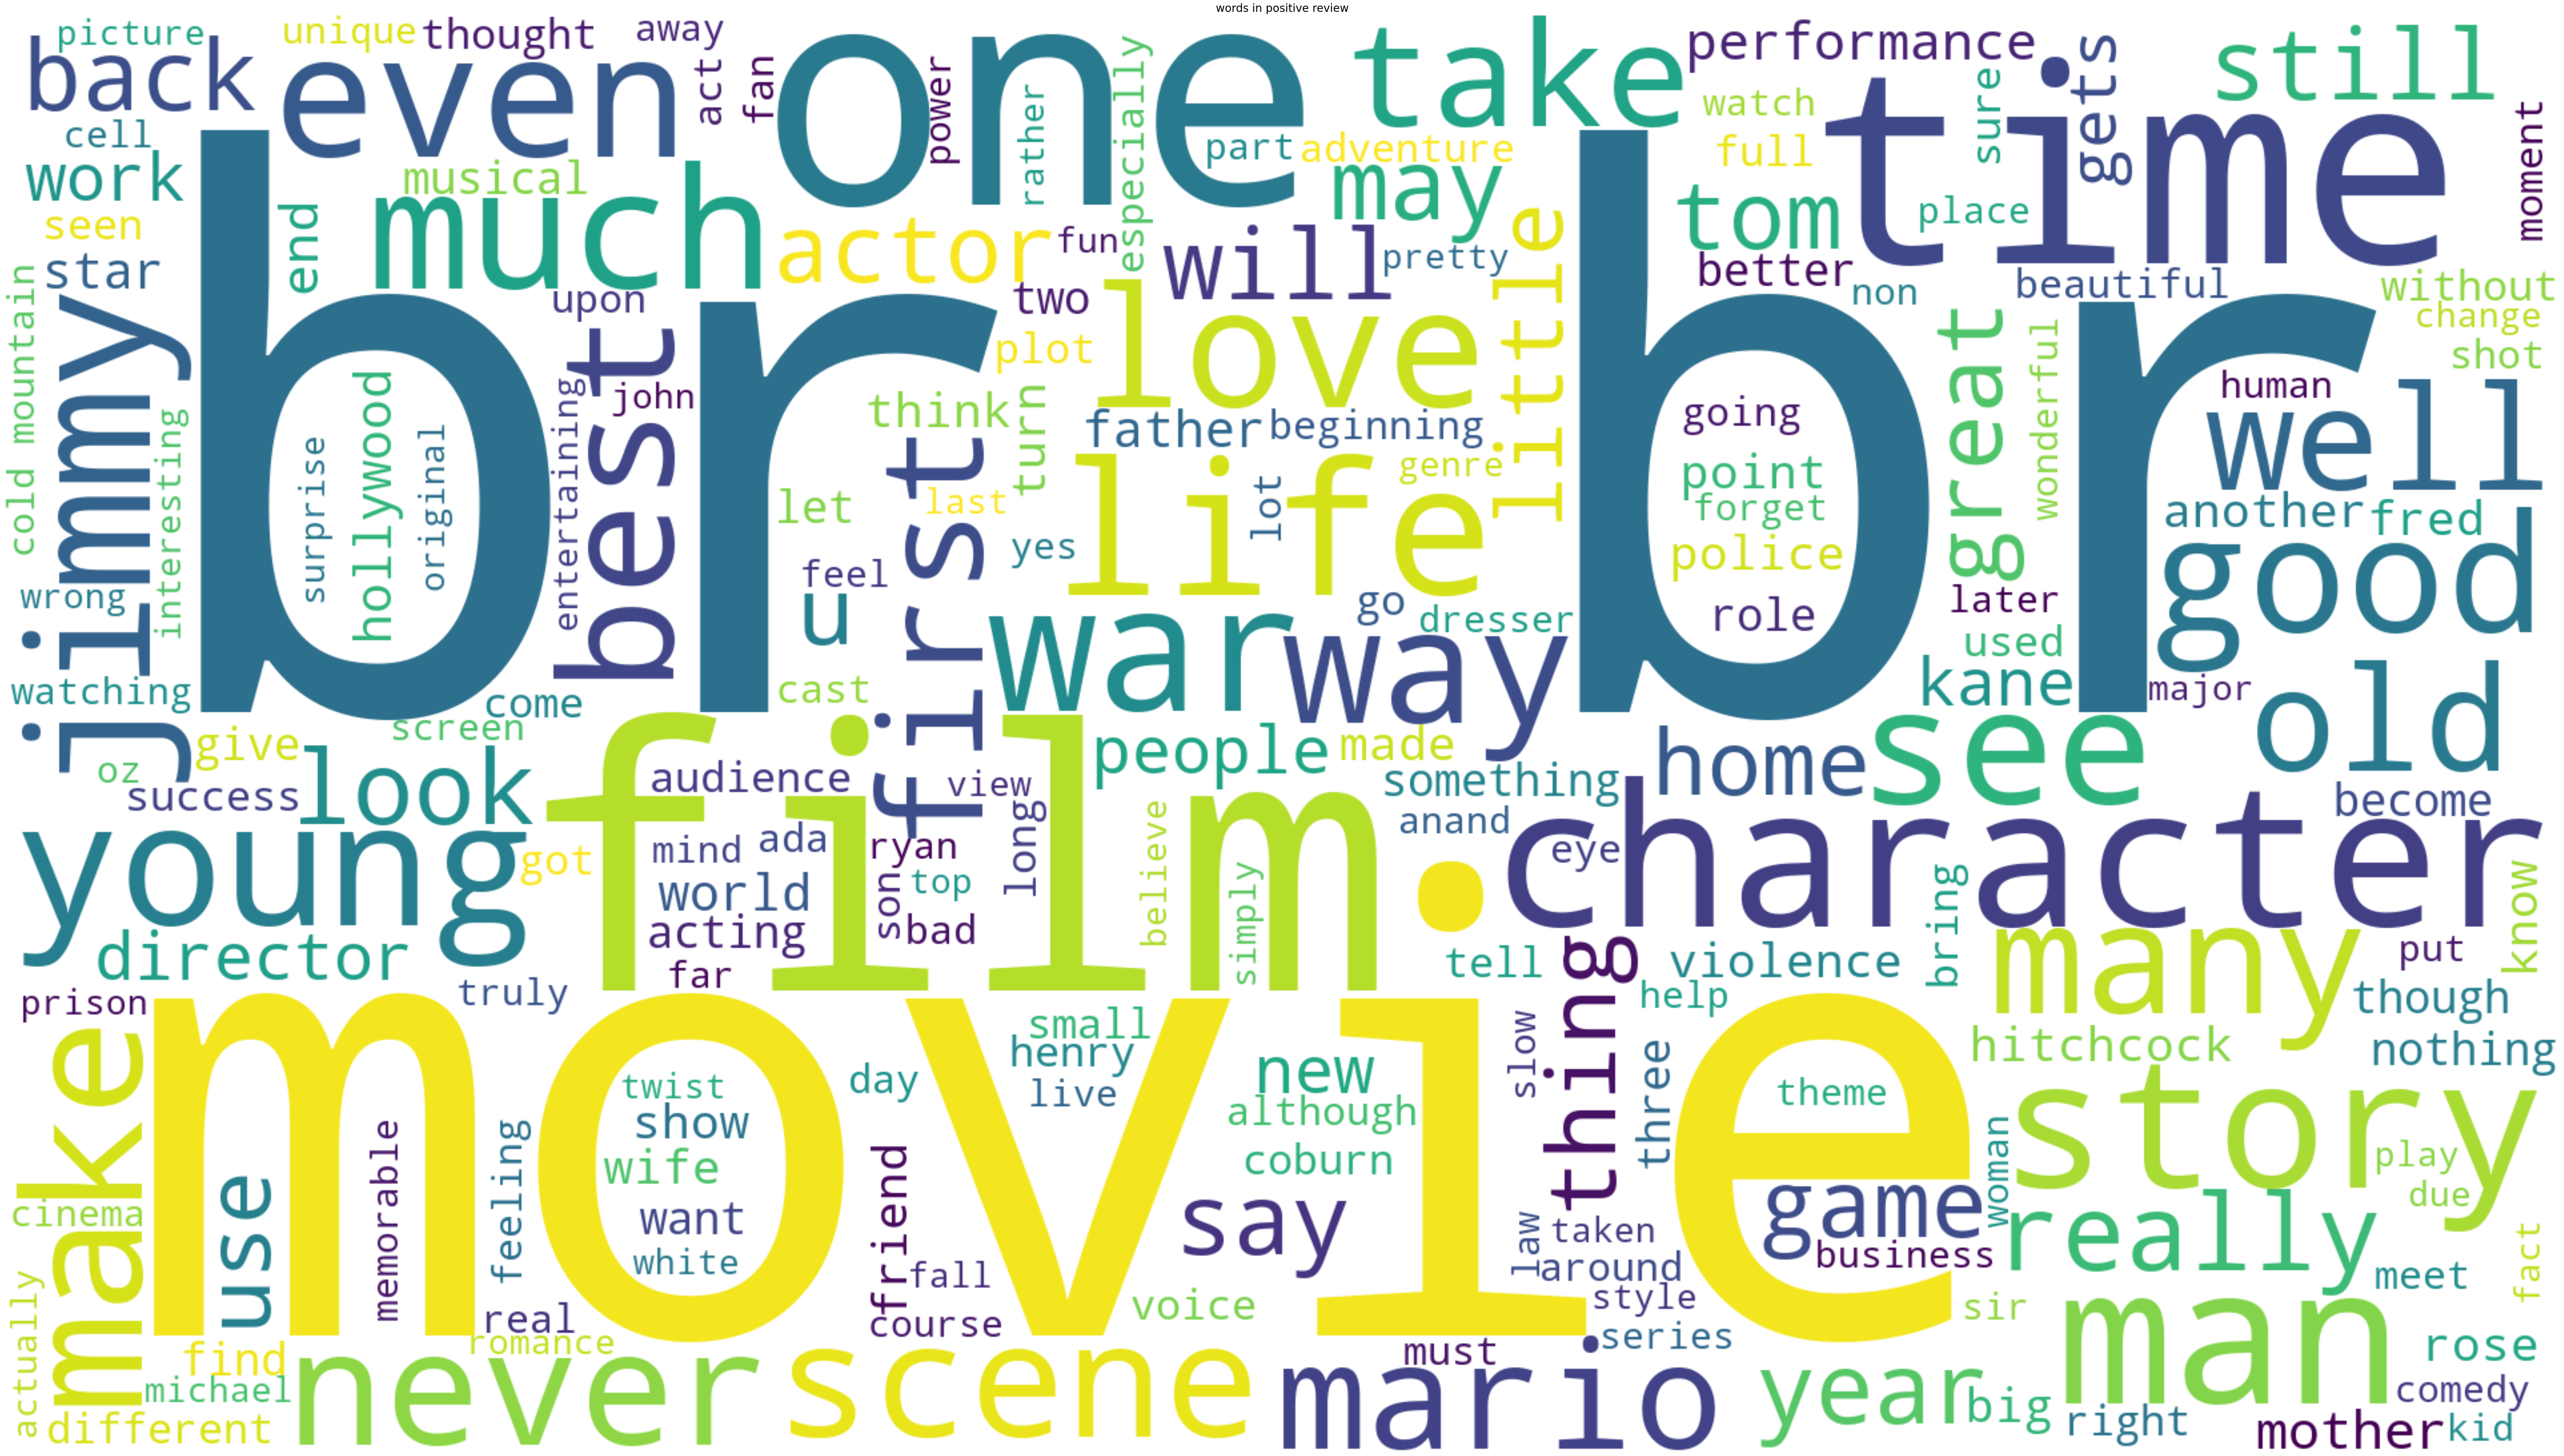

In [8]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')

In [9]:
def text_processing(data):
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above stundents 
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data['review'].values):
        sentance = re.sub(r"http\S+", "", sentance) # removing https tags
        sentance = BeautifulSoup(sentance, 'lxml').get_text()  # removing lxmls tags
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()  # removing extra (more then 1 space) spaces
        # https://gist.github.com/sebleier/554280



        # This line of code is converting the `sentance` string into a list of words by splitting it based on spaces (`sentance.split()`), 
        # then it is converting each word to lowercase (`e.lower()`) and checking if the word is not in the `stopwords` 
        # Finally, it joins these filtered words back into a string with spaces in between (`' '.join(...)`).
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
        preprocessed_reviews.append(sentance.strip()) # removing spaces in last of sentence
    

    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list2=[]
    for  sentence in preprocessed_reviews:
      list1=[]
      for words in sentence.split():
        list1.append(porter.stem(words))

      list2.append(' '.join(list1))
    return(list2)

# Making All words into it's root word

In [10]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
porter.stem('Going')

'go'

# Dowload Necessaries for nltk

In [11]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abeer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abeer\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
# import these modules
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos="a"))


rocks : rock
corpora : corpus
better : good


In [13]:
x=text_processing(data_frame)

100%|██████████| 100/100 [00:00<00:00, 953.83it/s]


# creating new column

In [14]:
data_frame['cleaned_review']=x

In [15]:
data_frame.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                      cleaned_review  
0  one review mention watch oz episod will hooked...  
1  a wonder littl production. the film techniqu u...  
2  i thought wonder way spend time hot summer wee...  
3  basic famili littl boy (jake) think zombi clos...  
4  petter mattei love time money visual stun film...

# End of Pre-Processiong

# Strated Model Training

In [19]:
data_frame_x=data_frame['cleaned_review']
data_frame_y=data_frame['sentiment'] 

In [20]:
data_frame_x.shape

(100,)

In [21]:
data_frame_y.shape

(100,)

# Destribution of data into test and train

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_frame_x[:1000], data_frame_y[:1000], test_size=0.2, random_state=0)

# train_test_split()

# Getting the ratio

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80,), (20,), (80,), (20,))

# Counting the overall number of positive and negetive reviews

In [32]:
y_train.value_counts()

sentiment
negative    50
positive    30
Name: count, dtype: int64

In [35]:
X_train

43    i heard good thing state grace came open mind....
62    so let begin!)))th movi origin cronenberg movi...
3     basic famili littl boy (jake) think zombi clos...
71    honestli - short film sucks. dummi use necro s...
45    as disclaimer, i seen movi time last years, i ...
                            ...                        
96    my guess origin go least two parts, thu least ...
67    i realli salman kahn i realli disappoint i see...
64    an unmarri woman name stella (bett midler) get...
47    how film classifi drama, i idea. if i john voi...
44    thi movi struck home me. be i rememb father wo...
Name: cleaned_review, Length: 80, dtype: object

# Data Processing with BOW

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(max_features=200) # outpu6: ((80, 200), (20, 200))
#vectorizer = CountVectorizer(ngram_range=(1, 2)) # taking multiple words iin combination {bi-gram, tri-gram}
vectorizer = CountVectorizer(max_features=10, ngram_range=(1, 2)) 
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# getting shape of train and test data
X_train_bow.shape,X_test_bow.shape

((80, 10), (20, 10))

In [51]:
list(X_test_bow.toarray()[0])

[0, 0, 5, 2, 0, 9, 0, 2, 2, 6]

# Giving priority to very less minority words

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 10,ngram_range=(1,2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.fit_transform(X_test)

X_train_bow.shape,X_test_bow.shape

((80, 10), (20, 10))

# PCA (Optional)

# >>> import numpy as np
# >>> from sklearn.decomposition import PCA
# >>> pca = PCA(n_components=2)
# >>> dimention_reduced_data = pca.fit_transform(X.toarray())

# print(pca.explained_variance_ratio_)

# import pandas as pd
# principal_breast_Df = pd.DataFrame(data = dimention_reduced_data, columns = ['principal component 1', 'principal component 2'])

# principal_breast_Df